In [4]:
import networkx as nx
import igraph as ig
import rustworkx as rx
import time
import matplotlib.pyplot as plt

In [5]:
def load_dimacs_graph(filename):
    """Load a DIMACS format .gr file and return as NetworkX, igraph, and rustworkx graphs"""
    
    # Parse the file
    nodes = set()
    edges = []
    
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('a '):  # Edge line
                parts = line.split()
                source, target, weight = int(parts[1]), int(parts[2]), int(parts[3])
                nodes.add(source)
                nodes.add(target)
                edges.append((source, target, weight))
            elif line.startswith('p sp'):  # Problem line
                parts = line.split()
                num_nodes, num_edges = int(parts[2]), int(parts[3])
    
    # Create NetworkX graph
    G_nx = nx.DiGraph()
    for source, target, weight in edges:
        G_nx.add_edge(source, target, weight=weight)
    
    # Create igraph graph
    G_ig = ig.Graph(directed=True)
    node_list = sorted(nodes)
    node_map = {node: idx for idx, node in enumerate(node_list)}
    G_ig.add_vertices(len(node_list))
    G_ig.add_edges([(node_map[s], node_map[t]) for s, t, w in edges])
    G_ig.es['weight'] = [w for s, t, w in edges]
    
    # Create rustworkx graph
    G_rx = rx.PyDiGraph()
    rx_node_map = {}
    for node in node_list:
        rx_node_map[node] = G_rx.add_node(node)
    for source, target, weight in edges:
        G_rx.add_edge(rx_node_map[source], rx_node_map[target], weight)
    
    return G_nx, G_ig, G_rx

rome_nx, rome_ig, rome_rx = load_dimacs_graph('rome99.gr')
ny_nx, ny_ig, ny_rx = load_dimacs_graph('USA-road-d.NY.gr')
e_nx, e_ig, e_rx = load_dimacs_graph('USA-road-d.E.gr')

/Users/dkVenom/Desktop/cs598/Project/nx-cpp/.venv/lib/python3.10/site-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cpp' backend in the call to pagerank.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_converted_graphs` c

PageRank times (seconds):
  NetworkX: 38.6088s
  NetworkX+CPP: 6.8746s
  NetworkX+CPP_cache: 0.5573s
  igraph: 2.7043s
  rustworkx: 1.5492s


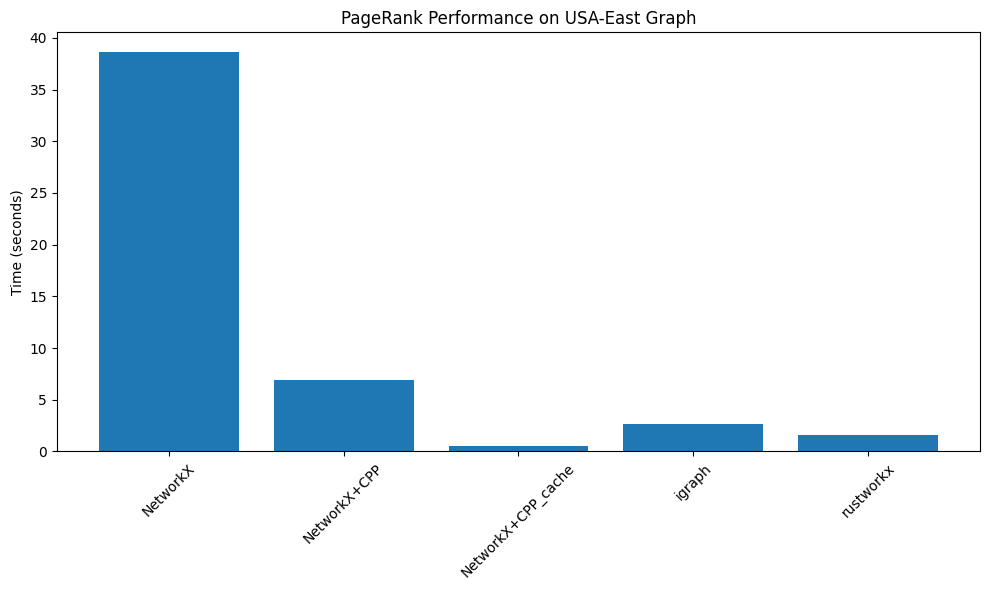

In [8]:
# PageRank
times = {}

# NetworkX (pure Python)
start = time.time()
_ = nx.pagerank(e_nx)
times['NetworkX'] = time.time() - start

e_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = nx.pagerank(e_nx, backend="cpp")
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = nx.pagerank(e_nx, backend="cpp")
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = e_ig.pagerank()
times['igraph'] = time.time() - start

# rustworkx
start = time.time()
_ = rx.pagerank(e_rx)
times['rustworkx'] = time.time() - start

# Display results
print("PageRank times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title('PageRank Performance on USA-East Graph')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

BFS Edges times (seconds):
  NetworkX: 26.0209s
  NetworkX+CPP: 9.4012s
  NetworkX+CPP_cache: 1.0581s
  igraph: 1.6952s
  rustworkx: 20.2885s


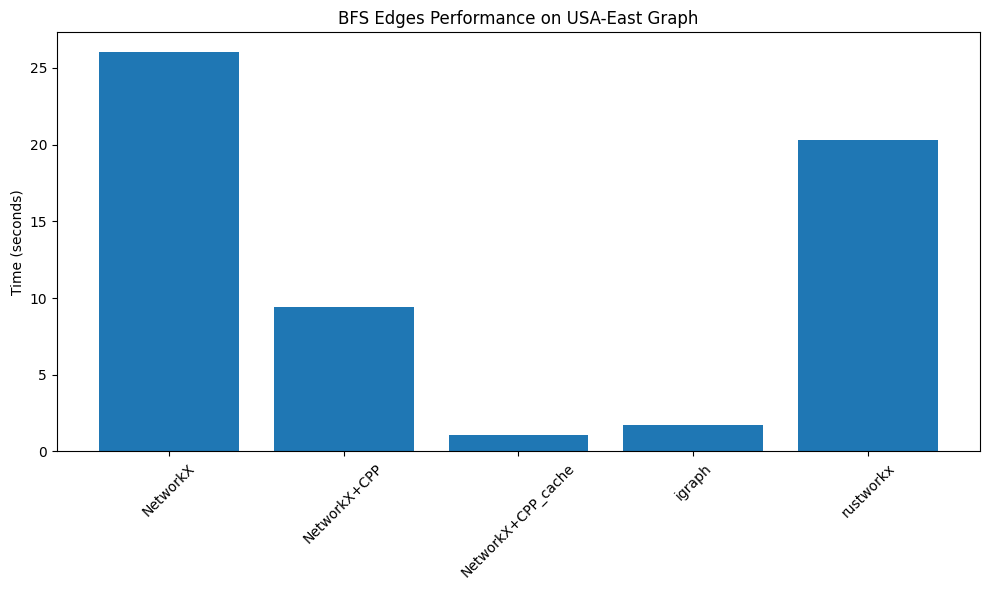

In [10]:
# BFS Edges
times = {}

# NetworkX (pure Python)
source = next(iter(e_nx.nodes))
start = time.time()
_ = list(nx.bfs_edges(e_nx, source))
times['NetworkX'] = time.time() - start

e_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = list(nx.bfs_edges(e_nx, source, backend="cpp"))
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = list(nx.bfs_edges(e_nx, source, backend="cpp"))
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = list(e_ig.bfsiter(0, advanced=True))
times['igraph'] = time.time() - start

# rustworkx
rx_source = next(iter(e_rx.nodes()))
start = time.time()
_ = list(rx.bfs_successors(e_rx, rx_source))
times['rustworkx'] = time.time() - start

# Display results
print("BFS Edges times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title('BFS Edges Performance on USA-East Graph')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/dkVenom/Desktop/cs598/Project/nx-cpp/.venv/lib/python3.10/site-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cpp' backend in the call to dfs_edges.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_converted_graphs` 

DFS Edges times (seconds):
  NetworkX: 5.3164s
  NetworkX+CPP: 7.9072s
  NetworkX+CPP_cache: 1.0048s
  igraph: 1.4716s
  rustworkx: 1.8988s


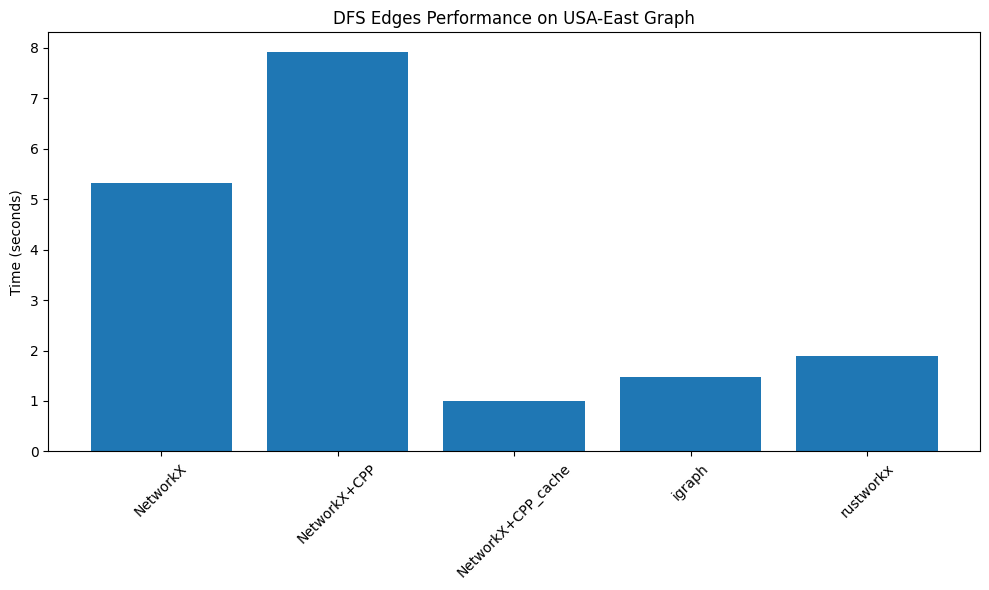

In [11]:
# DFS Edges
times = {}

# NetworkX (pure Python)
source = next(iter(e_nx.nodes))
start = time.time()
_ = list(nx.dfs_edges(e_nx, source))
times['NetworkX'] = time.time() - start

e_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = list(nx.dfs_edges(e_nx, source, backend="cpp"))
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = list(nx.dfs_edges(e_nx, source, backend="cpp"))
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = list(e_ig.dfsiter(0, advanced=True))
times['igraph'] = time.time() - start

# rustworkx
rx_source = next(iter(e_rx.nodes()))
start = time.time()
_ = list(rx.dfs_edges(e_rx, rx_source))
times['rustworkx'] = time.time() - start

# Display results
print("DFS Edges times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title('DFS Edges Performance on USA-East Graph')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/dkVenom/Desktop/cs598/Project/nx-cpp/.venv/lib/python3.10/site-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cpp' backend in the call to shortest_path.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_converted_grap

Shortest Path times (seconds):
  NetworkX: 399.6632s
  NetworkX+CPP: 11.3466s
  NetworkX+CPP_cache: 0.4393s
  igraph: 1.9008s
  rustworkx: 74.8779s


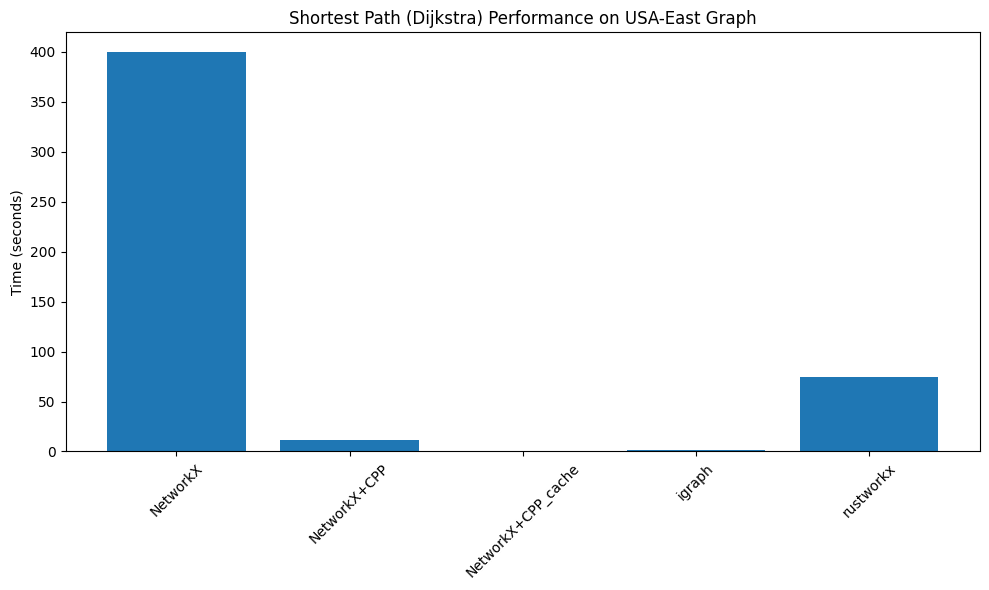

In [12]:
# Shortest Path
times = {}

# Pick source and target
source = next(iter(e_nx.nodes))
bfs_nodes = [source] + [v for _, v in nx.bfs_edges(e_nx, source)]
target = bfs_nodes[-1] if bfs_nodes else source

# NetworkX (pure Python)
start = time.time()
_ = nx.shortest_path(e_nx, source=source, target=target, weight="weight", method="dijkstra")
times['NetworkX'] = time.time() - start

e_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = nx.shortest_path(e_nx, source=source, target=target, weight="weight", method="dijkstra", backend="cpp")
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = nx.shortest_path(e_nx, source=source, target=target, weight="weight", method="dijkstra", backend="cpp")
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = e_ig.get_shortest_path(0, len(e_ig.vs)-1, weights='weight')
times['igraph'] = time.time() - start

# rustworkx
rx_source = next(iter(e_rx.nodes()))
rx_nodes = list(e_rx.nodes())
rx_target = rx_nodes[-1] if rx_nodes else rx_source
start = time.time()
_ = rx.dijkstra_shortest_paths(e_rx, rx_source, target=rx_target, weight_fn=lambda e: e)
times['rustworkx'] = time.time() - start

# Display results
print("Shortest Path times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title('Shortest Path (Dijkstra) Performance on USA-East Graph')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/dkVenom/Desktop/cs598/Project/nx-cpp/.venv/lib/python3.10/site-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cpp' backend in the call to betweenness_centrality.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_conve

Betweenness Centrality times (seconds):
  NetworkX: 26.6555s
  NetworkX+CPP: 0.0688s
  NetworkX+CPP_cache: 0.0560s
  igraph: 0.2482s
  rustworkx: 0.4466s


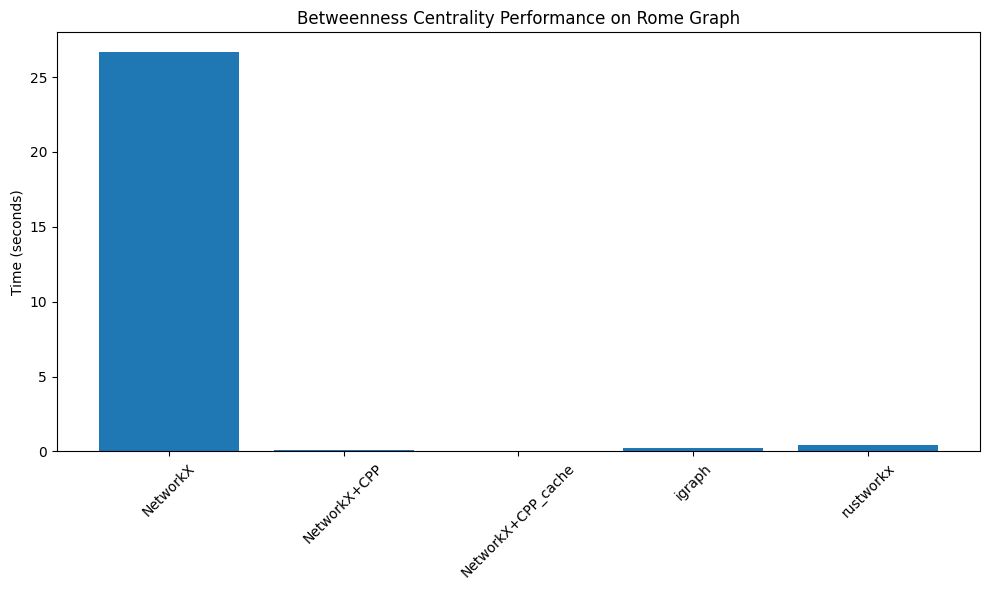

In [13]:
# Betweenness Centrality
times = {}

# NetworkX (pure Python)
start = time.time()
_ = nx.betweenness_centrality(rome_nx)
times['NetworkX'] = time.time() - start

rome_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = nx.betweenness_centrality(rome_nx, backend="cpp")
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = nx.betweenness_centrality(rome_nx, backend="cpp")
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = rome_ig.betweenness()
times['igraph'] = time.time() - start

# rustworkx
start = time.time()
_ = rx.betweenness_centrality(rome_rx)
times['rustworkx'] = time.time() - start

# Display results
print("Betweenness Centrality times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title('Betweenness Centrality Performance on Rome Graph')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creating graphs...
Created graphs with 3000000 nodes


/Users/dkVenom/Desktop/cs598/Project/nx-cpp/.venv/lib/python3.10/site-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cpp' backend in the call to connected_components.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_convert


Connected Components times (seconds):
  NetworkX: 1.3539s
  NetworkX+CPP: 2.7877s
  NetworkX+CPP_cache: 0.4390s
  igraph: 0.2214s
  rustworkx: 0.2380s


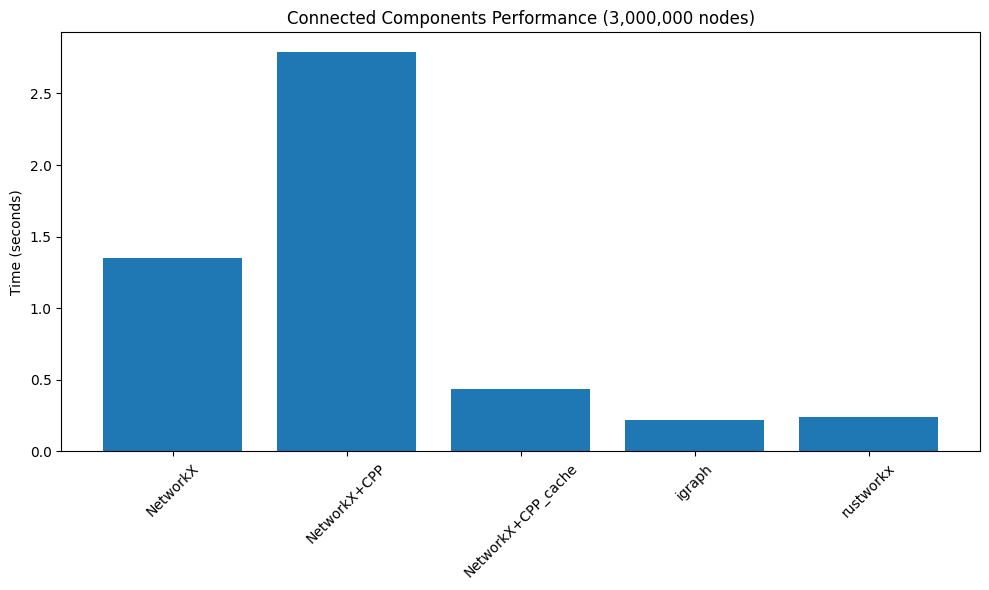

In [14]:
# Connected Components
def make_multi_component_path_graph_nx(num_components, component_size):
    G = nx.Graph()
    node_id = 0
    for _ in range(num_components):
        nodes = list(range(node_id, node_id + component_size))
        edges = [(nodes[i], nodes[i + 1]) for i in range(component_size - 1)]
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        node_id += component_size
    return G

def make_multi_component_path_graph_ig(num_components, component_size):
    G = ig.Graph()
    total_nodes = num_components * component_size
    G.add_vertices(total_nodes)
    
    edges = []
    node_id = 0
    for _ in range(num_components):
        for i in range(component_size - 1):
            edges.append((node_id + i, node_id + i + 1))
        node_id += component_size
    
    G.add_edges(edges)
    return G

def make_multi_component_path_graph_rx(num_components, component_size):
    G = rx.PyGraph()
    node_id = 0
    for _ in range(num_components):
        nodes = [G.add_node(node_id + i) for i in range(component_size)]
        for i in range(component_size - 1):
            G.add_edge(nodes[i], nodes[i + 1], None)
        node_id += component_size
    return G

num_components = 1000
component_size = 3000

print("Creating graphs...")
cc_nx = make_multi_component_path_graph_nx(num_components, component_size)
cc_ig = make_multi_component_path_graph_ig(num_components, component_size)
cc_rx = make_multi_component_path_graph_rx(num_components, component_size)
print(f"Created graphs with {num_components * component_size} nodes")

# Connected Components
times = {}

# NetworkX (pure Python)
start = time.time()
_ = list(nx.connected_components(cc_nx))
times['NetworkX'] = time.time() - start

cc_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = list(nx.connected_components(cc_nx, backend="cpp", method="bfs"))
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = list(nx.connected_components(cc_nx, backend="cpp", method="bfs"))
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = cc_ig.connected_components()
times['igraph'] = time.time() - start

# rustworkx
start = time.time()
_ = rx.connected_components(cc_rx)
times['rustworkx'] = time.time() - start

# Display results
print("\nConnected Components times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title(f'Connected Components Performance ({num_components * component_size:,} nodes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creating weighted random graphs...
Created graphs with 50000 nodes

Minimum Spanning Tree times (seconds):
  NetworkX: 0.9063s
  NetworkX+CPP: 0.4339s
  NetworkX+CPP_cache: 0.0952s
  igraph: 0.0415s
  rustworkx: 0.0415s


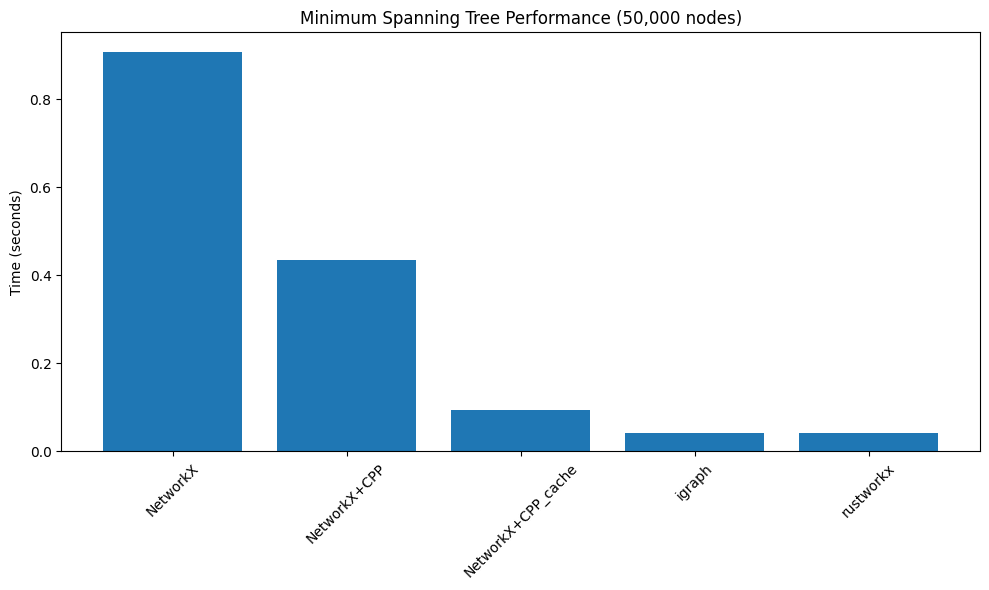

In [17]:
# Minimum Spanning Tree
def make_weighted_gnp_nx(n, p, rng_seed, weight_key="weight"):
    G = nx.gnp_random_graph(n, p, seed=rng_seed)
    for idx, (u, v) in enumerate(G.edges()):
        G[u][v][weight_key] = float(idx + 1)
    return G

def make_weighted_gnp_ig(n, p, rng_seed, weight_key="weight"):
    import random
    random.seed(rng_seed)
    G = ig.Graph.Erdos_Renyi(n=n, p=p)
    weights = [float(idx + 1) for idx in range(G.ecount())]
    G.es[weight_key] = weights
    return G

def make_weighted_gnp_rx(n, p, rng_seed):
    import random
    random.seed(rng_seed)
    G = rx.PyGraph()
    nodes = [G.add_node(i) for i in range(n)]
    
    # Generate edges with probability p
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                edges.append((i, j))
    
    for idx, (u, v) in enumerate(edges):
        G.add_edge(u, v, float(idx + 1))
    
    return G

n = 50000
p = 0.0005
rng_seed = 7

print("Creating weighted random graphs...")
mst_nx = make_weighted_gnp_nx(n, p, rng_seed)
mst_ig = make_weighted_gnp_ig(n, p, rng_seed)
mst_rx = make_weighted_gnp_rx(n, p, rng_seed)
print(f"Created graphs with {n} nodes")

# Minimum Spanning Tree
times = {}

# NetworkX (pure Python)
start = time.time()
_ = nx.minimum_spanning_tree(mst_nx, weight="weight")
times['NetworkX'] = time.time() - start

mst_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = nx.minimum_spanning_tree(mst_nx, weight="weight", algorithm="kruskal", backend="cpp")
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = nx.minimum_spanning_tree(mst_nx, weight="weight", algorithm="kruskal", backend="cpp")
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = mst_ig.spanning_tree(weights="weight")
times['igraph'] = time.time() - start

# rustworkx
start = time.time()
_ = rx.minimum_spanning_tree(mst_rx, weight_fn=lambda e: e)
times['rustworkx'] = time.time() - start

# Display results
print("\nMinimum Spanning Tree times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title(f'Minimum Spanning Tree Performance ({n:,} nodes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Creating subgraphs with 3000 nodes...
Created subgraphs

Isomorphism times (seconds):
  NetworkX: 16.6175s
  NetworkX+CPP: 0.0333s
  NetworkX+CPP_cache: 0.0250s
  igraph: 0.0114s
  rustworkx: 0.0090s


/Users/dkVenom/Desktop/cs598/Project/nx-cpp/.venv/lib/python3.10/site-packages/networkx/utils/backends.py:1777: UserWarning: Note: conversions to backend graphs are saved to cache (`G.__networkx_cache__` on the original graph) by default.

This warning means the cached graph is being used for the 'cpp' backend in the call to is_isomorphic.

For the cache to be consistent (i.e., correct), the input graph must not have been manually mutated since the cached graph was created. Examples of manually mutating the graph data structures resulting in an inconsistent cache include:

    >>> G[u][v][key] = val

and

    >>> for u, v, d in G.edges(data=True):
    ...     d[key] = val

Using methods such as `G.add_edge(u, v, weight=val)` will correctly clear the cache to keep it consistent. You may also use `G.__networkx_cache__.clear()` to manually clear the cache, or set `G.__networkx_cache__` to None to disable caching for G. Enable or disable caching globally via `nx.config.cache_converted_grap

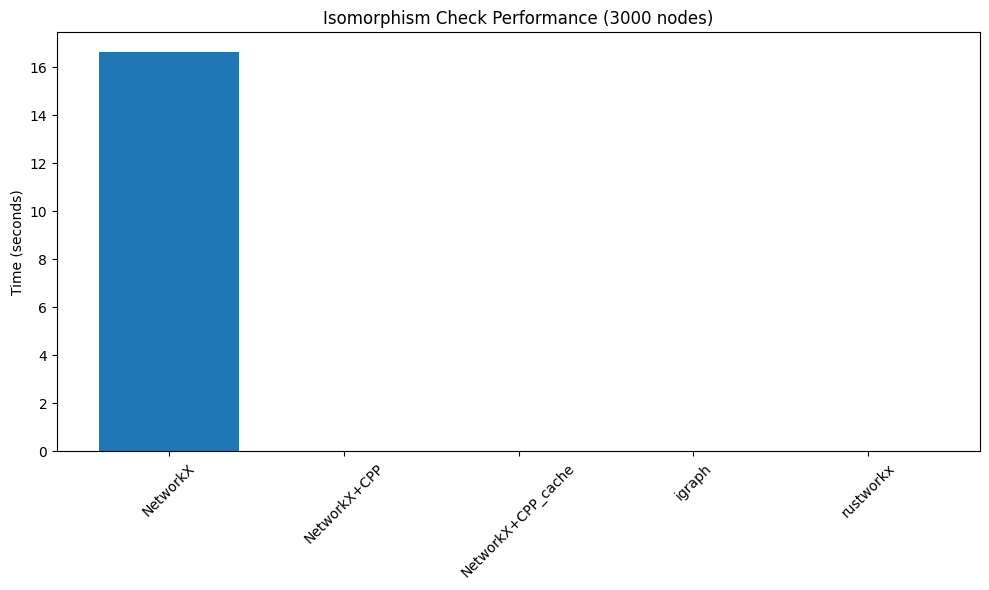

In [16]:
# Isomorphism
def induced_subgraph_first_n(G, n_nodes):
    """
    take the induced subgraph on the first n_nodes in G.nodes()
    """
    nodes = []
    for i, u in enumerate(G.nodes()):
        if i >= n_nodes:
            break
        nodes.append(u)
    return G.subgraph(nodes).copy()

sub_n = 3000
print(f"Creating subgraphs with {sub_n} nodes...")
G_sub_nx = induced_subgraph_first_n(ny_nx, sub_n)
G1_nx = G_sub_nx
G2_nx = G_sub_nx.copy()

# Create igraph subgraph
G_sub_ig = ny_ig.subgraph(list(range(min(sub_n, ny_ig.vcount()))))
G1_ig = G_sub_ig
G2_ig = G_sub_ig.copy()

# Create rustworkx subgraph
rx_nodes = list(ny_rx.nodes())[:sub_n]
G_sub_rx = ny_rx.subgraph(rx_nodes)
G1_rx = G_sub_rx
G2_rx = G_sub_rx.copy()

print(f"Created subgraphs")

# Isomorphism
times = {}

# NetworkX (pure Python)
start = time.time()
_ = nx.is_isomorphic(G1_nx, G2_nx)
times['NetworkX'] = time.time() - start

G1_nx.__networkx_cache__.clear()
G2_nx.__networkx_cache__.clear()
# NetworkX with C++ backend
start = time.time()
_ = nx.is_isomorphic(G1_nx, G2_nx, backend="cpp")
times['NetworkX+CPP'] = time.time() - start

# NetworkX with C++ backend hitting cache
start = time.time()
_ = nx.is_isomorphic(G1_nx, G2_nx, backend="cpp")
times['NetworkX+CPP_cache'] = time.time() - start

# igraph
start = time.time()
_ = G1_ig.isomorphic(G2_ig)
times['igraph'] = time.time() - start

# rustworkx
start = time.time()
_ = rx.is_isomorphic(G1_rx, G2_rx)
times['rustworkx'] = time.time() - start

# Display results
print("\nIsomorphism times (seconds):")
for lib, t in times.items():
    print(f"  {lib}: {t:.4f}s")

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(times.keys(), times.values())
plt.ylabel('Time (seconds)')
plt.title(f'Isomorphism Check Performance ({sub_n} nodes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()